In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

In [2]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [3]:
test_df = pd.read_csv(r'C:\Users\Supun\Desktop\Supun Backup\Supun\transfer\documents\myfiles\MScDA\DS\DM\Assignment2\test.csv')
train_df = pd.read_csv(r'C:\Users\Supun\Desktop\Supun Backup\Supun\transfer\documents\myfiles\MScDA\DS\DM\Assignment2\train.csv')
print('done reading')

done reading


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
#missing values
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(10)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0
Sex,0,0.0
Name,0,0.0
Pclass,0,0.0


C:\Users\Supun\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Supun\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Supun\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

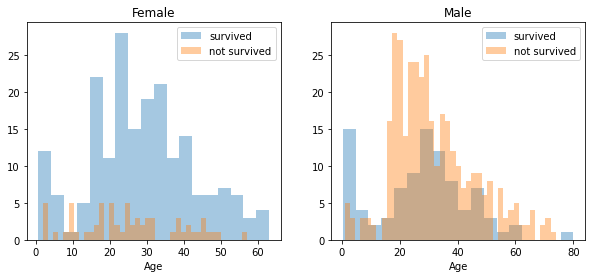

In [7]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

In [8]:
#drop PassengerId
train_df = train_df.drop(['PassengerId'], axis=1)

In [9]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train_df, test_df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
# we can now drop the cabin feature
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

In [10]:
data = [train_df, test_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)
train_df["Age"].isnull().sum()

0

In [11]:
common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int32  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
 10  Deck      891 non-null    int32  
dtypes: float64(1), int32(2), int64(4), object(4)
memory usage: 69.7+ KB


In [13]:
data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [14]:
data = [train_df, test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

In [15]:
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [16]:
train_df['Ticket'].describe()

count          891
unique         681
top       CA. 2343
freq             7
Name: Ticket, dtype: object

In [17]:
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

In [18]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [19]:
data = [train_df, test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

In [20]:
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title
0,0,3,0,2,1,0,7,0,8,1
1,1,1,1,5,1,0,71,1,3,3
2,1,3,1,3,0,0,7,0,8,2
3,1,1,1,5,1,0,53,0,3,3
4,0,3,0,5,0,0,8,0,8,1
5,0,3,0,2,0,0,8,2,8,1
6,0,1,0,6,0,0,51,0,5,1
7,0,3,0,0,3,1,21,0,8,4
8,1,3,1,3,0,2,11,0,8,3
9,1,2,1,1,1,0,30,1,8,3


In [21]:
data = [train_df, test_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [22]:
data = [train_df, test_df]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

In [23]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [25]:
train_X, test_X, train_y, test_y = train_test_split(X_train, Y_train, test_size=0.20,random_state=0)

In [28]:
#ID3 decision tree classifier

dt3 = DecisionTreeClassifier(criterion = "entropy") 
dt3.fit(train_X, train_y)
predictions3 = dt3.predict(test_X)

accuracy1 = accuracy_score(test_y, predictions3)
print(accuracy1)

0.8268156424581006


In [29]:
#Naive Bayes
gaussian2 = GaussianNB() 
gaussian2.fit(train_X, train_y)
predictions = gaussian2.predict(test_X)

accuracy2 = accuracy_score(test_y, predictions)
print(accuracy2)

0.7932960893854749


In [31]:
from sklearn.model_selection import cross_val_score

In [33]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [35]:
from sklearn.metrics import precision_score, recall_score

In [37]:
from sklearn.metrics import f1_score

In [38]:
#cross validation - decision tree (entropy)

dtc_entropy = DecisionTreeClassifier()
scores_entropy = cross_val_score(dtc_entropy, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores_entropy)
print("Mean:", scores_entropy.mean())
print("Standard Deviation:", scores_entropy.std())

predictions_dtc_entropy = cross_val_predict(dtc_entropy, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions_dtc_entropy)
print("Precision:", precision_score(Y_train, predictions_dtc_entropy))
print("Recall:",recall_score(Y_train, predictions_dtc_entropy))
print("F1 Score: ",f1_score(Y_train, predictions_dtc_entropy))

Scores: [0.74444444 0.79775281 0.75280899 0.74157303 0.85393258 0.83146067
 0.7752809  0.78651685 0.85393258 0.82022472]
Mean: 0.7957927590511862
Standard Deviation: 0.040699204598470574
Precision: 0.7705479452054794
Recall: 0.6578947368421053
F1 Score:  0.7097791798107257


In [39]:
#cross validation Naive bayes

from sklearn.model_selection import cross_val_score
nbc = GaussianNB()
scores1 = cross_val_score(nbc, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores1)
print("Mean:", scores1.mean())
print("Standard Deviation:", scores1.std())

predictions_nbc = cross_val_predict(nbc, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions_nbc)
print("Precision:", precision_score(Y_train, predictions_nbc))
print("Recall:",recall_score(Y_train, predictions_nbc))
print("F1 Score: ",f1_score(Y_train, predictions_nbc))

Scores: [0.74444444 0.76404494 0.7752809  0.76404494 0.79775281 0.78651685
 0.7752809  0.80898876 0.84269663 0.79775281]
Mean: 0.7856803995006243
Standard Deviation: 0.026342371204913232
Precision: 0.6923076923076923
Recall: 0.7894736842105263
F1 Score:  0.7377049180327868


In [40]:
#output submission files

decision = DecisionTreeClassifier(criterion = "entropy")
decision.fit(X_train, Y_train)  
Y_pred_d = decision.predict(X_test)

In [41]:
holdout_ids = test_df["PassengerId"]
submission_df = {"PassengerId": holdout_ids,
                 "Survived": Y_pred_d}
submission = pd.DataFrame(submission_df)
submission.to_csv("submission_decision_tree_id3.csv",index=False)

In [42]:
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)  
Y_pred_n = gaussian.predict(X_test)

In [43]:
holdout_ids = test_df["PassengerId"]
submission_df = {"PassengerId": holdout_ids,
                 "Survived": Y_pred_n}
submission = pd.DataFrame(submission_df)
submission.to_csv("submission_naivebayes.csv",index=False)

In [45]:
from sklearn.dummy import DummyClassifier

In [46]:
#dummy classifier 

dummy = DummyClassifier(strategy = "most_frequent", random_state = 0) 
dummy.fit(train_X, train_y) 
predictionsdummy = dummy.predict(test_X)

accuracy3 = accuracy_score(test_y, predictionsdummy)
print(accuracy3)

0.6145251396648045


In [47]:
#dummy classifier cross validation

dummy1 = DummyClassifier(strategy = "most_frequent", random_state = 0) 
scores2 = cross_val_score(nbc, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores2)
print("Mean:", scores2.mean())
print("Standard Deviation:", scores2.std())

predictions_dummy = cross_val_predict(dummy1, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions_dummy)
print("Precision:", precision_score(Y_train, predictions_dummy))
print("Recall:",recall_score(Y_train, predictions_dummy))
print("F1 Score: ",f1_score(Y_train, predictions_dummy))


Scores: [0.74444444 0.76404494 0.7752809  0.76404494 0.79775281 0.78651685
 0.7752809  0.80898876 0.84269663 0.79775281]
Mean: 0.7856803995006243
Standard Deviation: 0.026342371204913232
Precision: 0.0
Recall: 0.0
F1 Score:  0.0


C:\Users\Supun\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
dummyclassifier = DummyClassifier(strategy = "most_frequent", random_state = 0)
dummyclassifier.fit(X_train, Y_train)  
Y_pred_dummy = dummyclassifier.predict(X_test)

In [49]:
holdout_ids = test_df["PassengerId"]
submission_df = {"PassengerId": holdout_ids,
                 "Survived": Y_pred_dummy}
submission = pd.DataFrame(submission_df)
submission.to_csv("submission_dummy_rulebased.csv",index=False)